<a href="https://colab.research.google.com/github/chaitalisaha06/CSI_Assignments/blob/main/Data_Preprocessing_and_feature_engineering_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df= pd.read_csv('/content/drive/MyDrive/housing.csv')
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13029,-121.19,38.67,16.0,1754.0,284.0,773.0,277.0,4.8170,147000.0,INLAND
5302,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,500001.0,<1H OCEAN
15899,-122.41,37.75,52.0,3065.0,622.0,1405.0,606.0,3.7813,275900.0,NEAR BAY
1696,-122.27,38.00,12.0,1592.0,242.0,969.0,233.0,6.1576,248700.0,NEAR BAY
17215,-119.70,34.43,37.0,1462.0,306.0,678.0,322.0,5.1545,418400.0,<1H OCEAN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##  Handling Missing Values


In [67]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [68]:
# Fill missing values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Encoding Categorical Variables

In [69]:
# Encoding categorical variable
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

In [70]:
df["ocean_proximity_INLAND"] = df["ocean_proximity_INLAND"].astype(int)
df["ocean_proximity_ISLAND"] = df["ocean_proximity_ISLAND"].astype(int)
df["ocean_proximity_NEAR BAY"] = df["ocean_proximity_NEAR BAY"].astype(int)
df["ocean_proximity_NEAR OCEAN"] = df["ocean_proximity_NEAR OCEAN"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  int64  
 10  ocean_proximity_ISLAND      20640 non-null  int64  
 11  ocean_proximity_NEAR BAY    20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(9), int64(4)
memory 

In [71]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3511,-118.47,34.26,34.0,1300.0,289.0,650.0,291.0,3.8875,199200.0,0,0,0,0
2457,-119.65,36.51,30.0,1671.0,319.0,966.0,282.0,3.1333,100000.0,1,0,0,0
12236,-116.95,33.74,18.0,1996.0,405.0,1270.0,400.0,2.7083,91200.0,1,0,0,0
18785,-122.37,40.45,18.0,1748.0,337.0,921.0,327.0,3.3315,85400.0,1,0,0,0
4479,-118.16,34.07,41.0,247.0,55.0,925.0,50.0,3.5769,135700.0,0,0,0,0


## Feature Engineering

In [72]:
# Creating new features
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [73]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [74]:
df['population_per_household'] = df['population'] / df['households']

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  int64  
 10  ocean_proximity_ISLAND      20640 non-null  int64  
 11  ocean_proximity_NEAR BAY    20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
 13  rooms_per_household         206

## Feature Scaling

In [77]:
# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('median_house_value', axis=1))



In [78]:
# Creating a new DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, columns=df.drop('median_house_value', axis=1).columns)
scaled_data['median_house_value'] = df['median_house_value']



In [79]:
scaled_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,-0.681889,-0.015566,2.830742,-0.384466,0.628559,-1.029988,-0.049597,452600.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,-0.681889,-0.015566,2.830742,-0.384466,0.327041,-0.888897,-0.092512,358500.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,-0.681889,-0.015566,2.830742,-0.384466,1.155620,-1.291686,-0.025843,352100.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,-0.681889,-0.015566,2.830742,-0.384466,0.156966,-0.449613,-0.050329,341300.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,-0.681889,-0.015566,2.830742,-0.384466,0.344711,-0.639087,-0.085616,342200.0


### Correlation Between All The Features

<Axes: >

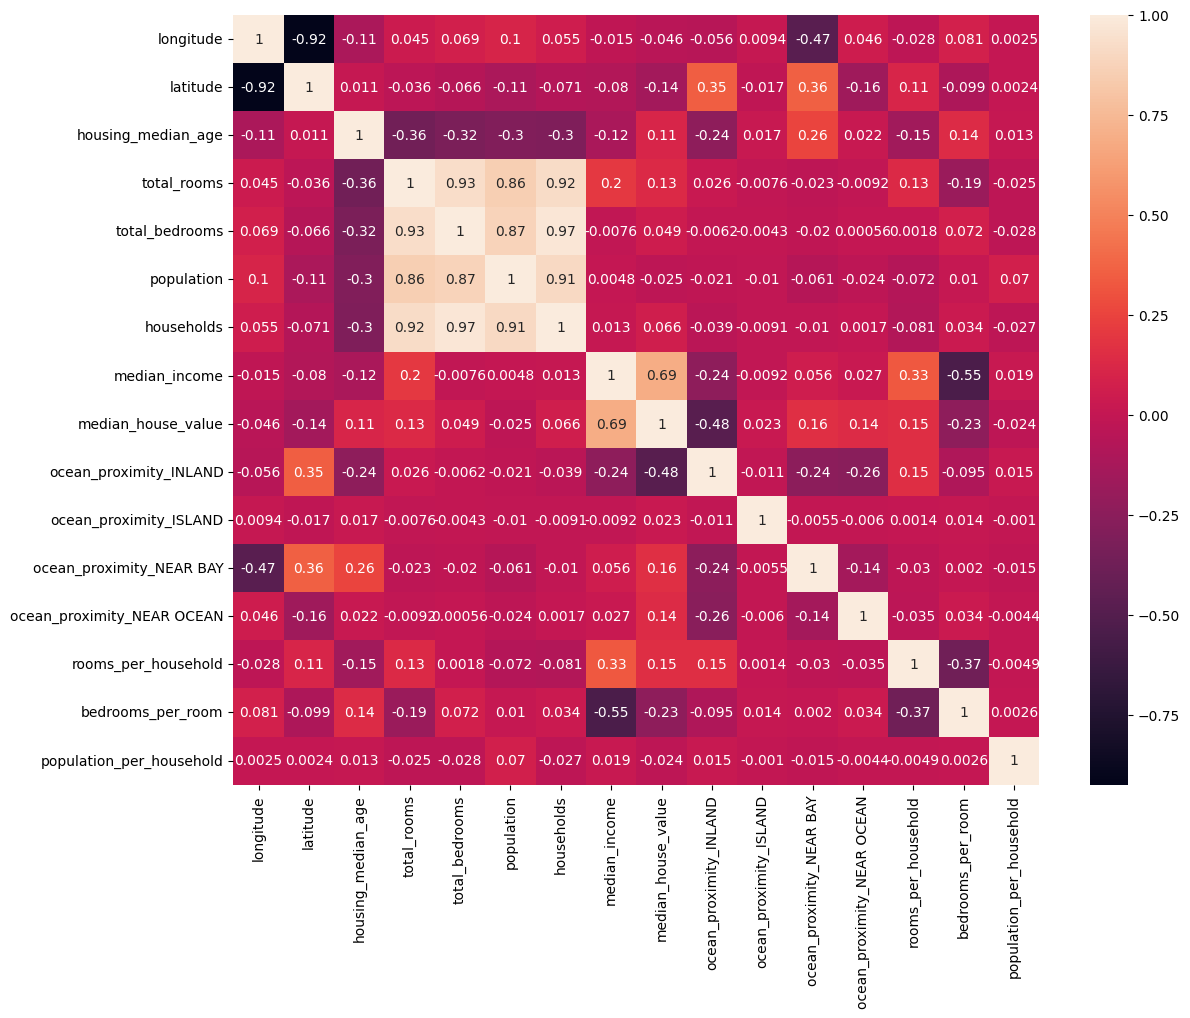

In [80]:
cor=df.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(cor,annot=True)
